In [309]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
import sklearn.metrics as m
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [310]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [311]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [312]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [313]:
dataset=pd.read_csv('/content/spam.csv',encoding='latin-1')
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [314]:
sent=dataset.iloc[:,[1]]['v2']

In [315]:
sent

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [316]:
label=dataset.iloc[:,[0]]['v1']

In [317]:
label

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [318]:
from sklearn.preprocessing import LabelEncoder

In [319]:
le=LabelEncoder()
label=le.fit_transform(label)

In [320]:
label

array([0, 0, 1, ..., 0, 0, 0])

In [321]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [322]:
import re

In [323]:
len(set(stopwords.words('english')))

179

In [324]:
stem=PorterStemmer()

In [325]:
sent

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [326]:
sentences=[]
for sen in sent:
  senti=re.sub('[^A-Za-z]',' ',sen)
  senti=senti.lower()
  words=word_tokenize(senti)
  word=[stem.stem(i) for i in words if i not in stopwords.words('english')]
  senti=' '.join(word)
  sentences.append(senti)


In [327]:
sentences

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breathe

In [328]:
from sklearn.feature_extraction.text import CountVectorizer

In [329]:
cv=CountVectorizer(max_features=5000)

In [330]:
features=cv.fit_transform(sentences)

In [331]:
features=features.toarray()

In [332]:
features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [333]:
len(cv.get_feature_names_out())

5000

In [334]:
feature_train,feature_test,label_train,label_test=train_test_split(features,label,test_size=0.2,random_state=7)

#Naive Bayes

In [335]:
model=MultinomialNB()
model.fit(feature_train,label_train)

MultinomialNB()

In [336]:
label_pred=model.predict(feature_test)

In [337]:
label_pred

array([0, 0, 0, ..., 0, 0, 0])

In [338]:
label_test

array([0, 0, 0, ..., 0, 0, 0])

In [339]:
m.accuracy_score(label_test,label_pred)

0.9856502242152466

Accuracy: 0.9856502242152466
Confusion Matrix:
[[960  10]
 [  6 139]]


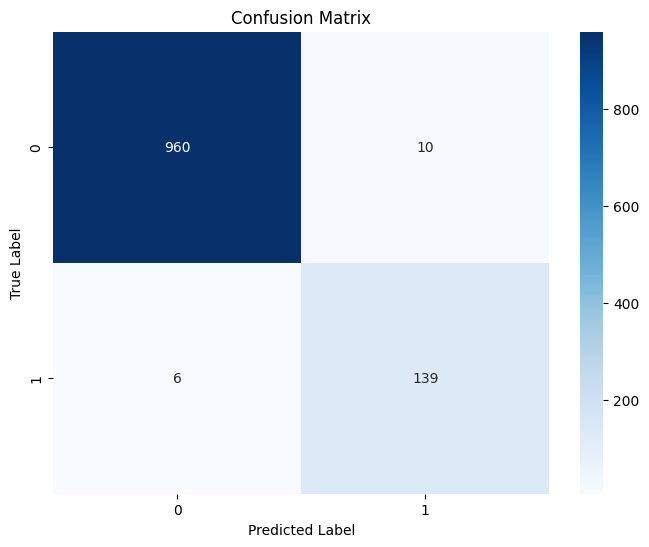

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       970
           1       0.93      0.96      0.95       145

    accuracy                           0.99      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [340]:
accuracy = m.accuracy_score(label_test, label_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(label_test, label_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report:")
print(m.classification_report(label_test, label_pred))


#SVC

In [341]:
model=SVC(kernel='linear')
model.fit(feature_train,label_train)

SVC(kernel='linear')

In [342]:
label_pred=model.predict(feature_test)

In [343]:
m.accuracy_score(label_test,label_pred)

0.9874439461883409

In [344]:
label_pred

array([0, 0, 0, ..., 0, 0, 0])

In [345]:
label_test

array([0, 0, 0, ..., 0, 0, 0])

Accuracy: 0.9874439461883409
Confusion Matrix:
[[967   3]
 [ 11 134]]


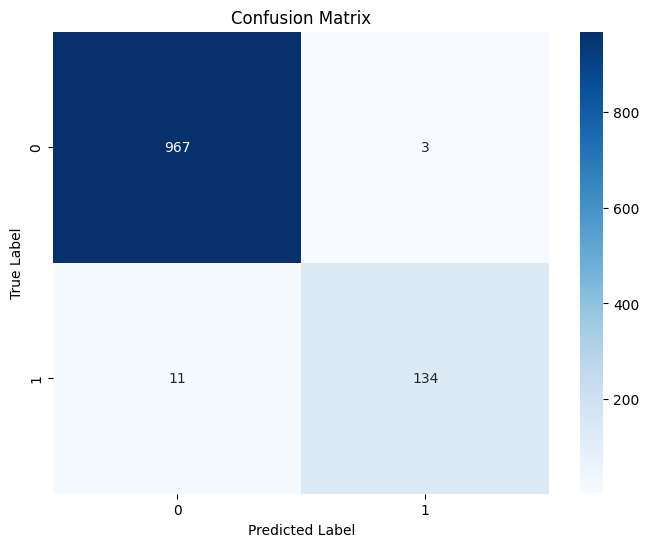

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       970
           1       0.98      0.92      0.95       145

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [346]:
accuracy = m.accuracy_score(label_test, label_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(label_test, label_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report:")
print(m.classification_report(label_test, label_pred))


#LogisticRegression

In [347]:
model=LogisticRegression()
model.fit(feature_train,label_train)

LogisticRegression()

In [348]:
label_pred=model.predict(feature_test)

In [349]:
m.accuracy_score(label_test,label_pred)

0.9865470852017937

In [350]:
label_pred

array([0, 0, 0, ..., 0, 0, 0])

In [351]:
label_test

array([0, 0, 0, ..., 0, 0, 0])

Accuracy: 0.9865470852017937
Confusion Matrix:
[[969   1]
 [ 14 131]]


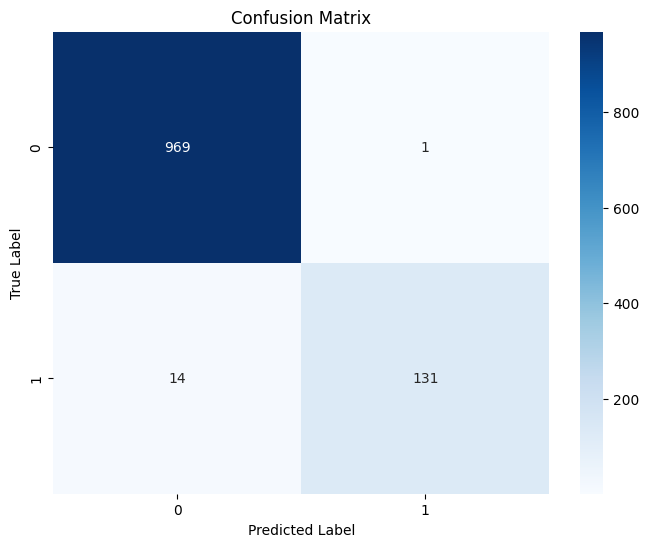

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       970
           1       0.99      0.90      0.95       145

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [352]:
accuracy = m.accuracy_score(label_test, label_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(label_test, label_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report:")
print(m.classification_report(label_test, label_pred))


#Decision Tree

In [353]:
model=DecisionTreeClassifier()
model.fit(feature_train,label_train)


DecisionTreeClassifier()

In [354]:
label_pred=model.predict(feature_test)

In [355]:
m.accuracy_score(label_test,label_pred)

0.9748878923766816

In [356]:
label_pred

array([0, 0, 0, ..., 0, 0, 0])

In [357]:
label_test

array([0, 0, 0, ..., 0, 0, 0])

Accuracy: 0.9748878923766816
Confusion Matrix:
[[962   8]
 [ 20 125]]


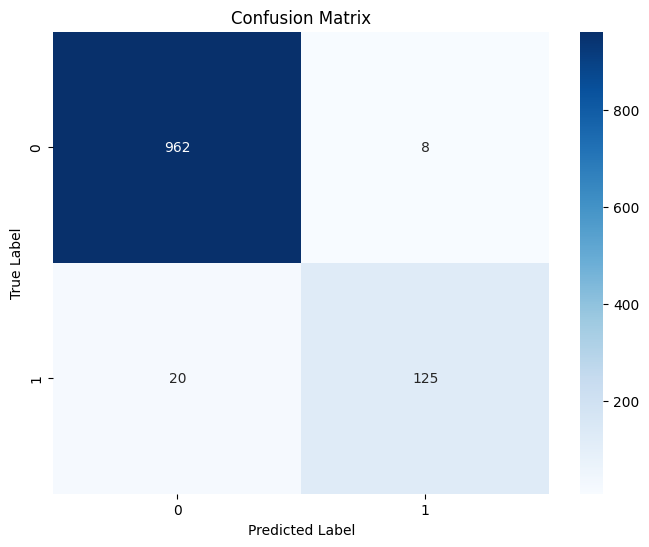

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       970
           1       0.94      0.86      0.90       145

    accuracy                           0.97      1115
   macro avg       0.96      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [358]:
accuracy = m.accuracy_score(label_test, label_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(label_test, label_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report:")
print(m.classification_report(label_test, label_pred))

In [359]:
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [360]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [361]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [362]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [363]:
mail_data.shape

(5572, 2)

In [364]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [365]:
X = mail_data['Message']

Y = mail_data['Category']

In [366]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [367]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [368]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [369]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [370]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [371]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [372]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [373]:
model = LogisticRegression()

In [374]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [375]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [376]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9670181736594121


In [377]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [378]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9659192825112107


In [380]:
input_mail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
input_data_features = feature_extraction.transform(input_mail)

prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Not Spam.')

else:
  print('This is a Spam!')

[0]
This is a Spam!
